#Thư viện

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

#Load data

Bộ dữ liệu CIFAR-10 gồm 50,000 ảnh 32x32 màu để train và 10,000 để test, label gồm 10: airplane, automobile, bird, cat, ..

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


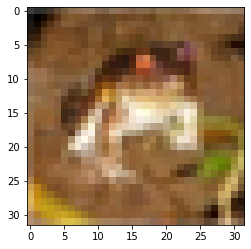

In [ ]:
plt.imshow(X_train[0])

#Xử lý dữ liệu

one hot encoding

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
#convert int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#chuẩn hoá từ màu 0-1
X_train = X_train/255.0
X_test = X_test/225.0

# Tạo model

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same') )
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)        

#Train model

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=15 ,batch_size=64)

Epoch 1/15
782/782 [==============================] - 16s 20ms/step - loss: 1.7672 - accuracy: 0.3505 - val_loss: 1.2159 - val_accuracy: 0.5582
Epoch 2/15
782/782 [==============================] - 15s 19ms/step - loss: 1.0806 - accuracy: 0.6179 - val_loss: 0.9568 - val_accuracy: 0.6703
Epoch 3/15
782/782 [==============================] - 15s 19ms/step - loss: 0.8272 - accuracy: 0.7160 - val_loss: 0.8394 - val_accuracy: 0.7173
Epoch 4/15
782/782 [==============================] - 15s 19ms/step - loss: 0.6733 - accuracy: 0.7649 - val_loss: 0.7373 - val_accuracy: 0.7498
Epoch 5/15
782/782 [==============================] - 15s 19ms/step - loss: 0.5478 - accuracy: 0.8084 - val_loss: 0.7486 - val_accuracy: 0.7540
Epoch 6/15
782/782 [==============================] - 15s 19ms/step - loss: 0.4612 - accuracy: 0.8379 - val_loss: 0.8276 - val_accuracy: 0.7457
Epoch 7/15
782/782 [==============================] - 15s 19ms/step - loss: 0.3733 - accuracy: 0.8709 - val_loss: 0.7716 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 7ms/step - loss: 1.3398 - accuracy: 0.7494
Test loss: 1.3397659063339233
Test accuracy: 0.7494000196456909


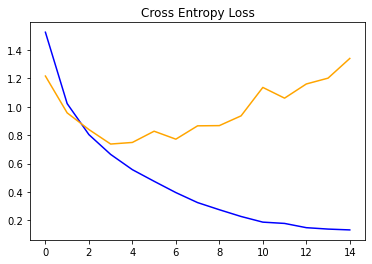

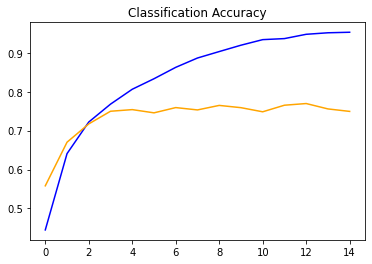

In [ ]:
import matplotlib.pyplot as plt
# plot loss
plt.subplot()
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.show()
# plot accuracy
plt.subplot()
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

plt.show()